In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error



import seaborn as sns
color=sns.color_palette()
sns.set_style('darkgrid')

# Data Exploration

In [47]:
trainData=pd.read_csv('public_dat/store_train.csv', sep =' ', header=None)
featureNames = ["shopID","dayOfWeek","date","visitNumber","open","promo","stateHoliday","schoolHoliday"]
trainData.columns = featureNames
dataCount=trainData.count()

target = pd.read_csv('public_dat/store_train_solution.csv', sep=' ', header=None)
targetCount=target.count()

trainData.head()

trainData["year"] = trainData["date"].map(lambda x : int(x[:4]))
trainData["month"] = trainData["date"].map(lambda x : int(x[5:7]))
trainData["day"] = trainData["date"].map(lambda x : int(x[8:]))

#del trainData["date"]

target.drop(trainData.index[trainData['stateHoliday'] == 'c'], inplace = True)
target.drop(trainData.index[trainData['stateHoliday'] == 'a'], inplace = True)
target.drop(trainData.index[trainData['stateHoliday'] == 'b'], inplace = True)


trainData.drop(trainData.index[trainData['stateHoliday'] == 'c'], inplace = True)
trainData.drop(trainData.index[trainData['stateHoliday'] == 'a'], inplace = True)
trainData.drop(trainData.index[trainData['stateHoliday'] == 'b'], inplace = True)






#trainData["dayOfWeek"]=pd.Categorical(trainData["dayOfWeek"],ordered=False)
#trainData["year"]=pd.Categorical(trainData["year"],ordered=False)
#trainData["month"]=pd.Categorical(trainData["month"],ordered=False)
#trainData["day"]=pd.Categorical(trainData["day"],ordered=False)



#trainDataDummies=pd.get_dummies(trainData[["dayOfWeek","year","month","day"]])

#trainData=pd.concat([trainData,trainDataDummies],axis=1)

#del trainData["year"]
#del trainData["month"]
#del trainData["day"]
#del trainData["dayOfWeek"]

#del trainData["shopID"]

trainData["target"]=target
trainData["relativeDay"]=trainData["day"]+(trainData["month"]-1)*30+(trainData["year"]-2013)*365
trainData.head()




testData=pd.read_csv('public_dat/store_test.csv', sep =' ', header=None)
featureNames = ["shopID","dayOfWeek","date","visitNumber","open","promo","stateHoliday","schoolHoliday"]
testData.columns = featureNames
testData.head()



testData["year"] = testData["date"].map(lambda x : int(x[:4]))
testData["month"] = testData["date"].map(lambda x : int(x[5:7]))
testData["day"] = testData["date"].map(lambda x : int(x[8:]))




#testData.drop(testData.index[testData['stateHoliday'] == 'c'], inplace = True)
#testData.drop(testData.index[testData['stateHoliday'] == 'a'], inplace = True)
#testData.drop(testData.index[testData['stateHoliday'] == 'b'], inplace = True)





In [61]:
s=testData[(testData["stateHoliday"]=='b')]
s[s["schoolHoliday"]!= 1]

,shopID,dayOfWeek,date,visitNumber,open,promo,stateHoliday,schoolHoliday,year,month,day
2748,772,1,2015-04-06,0,0,0,b,0,2015,4,6
7239,177,1,2015-04-06,0,0,0,b,0,2015,4,6
7863,1059,5,2015-04-03,0,0,1,b,0,2015,4,3
10345,28,5,2015-04-03,0,0,1,b,0,2015,4,3
19809,783,5,2014-04-18,0,0,1,b,0,2014,4,18
21162,772,5,2013-03-29,0,0,1,b,0,2013,3,29
23513,48,1,2013-04-01,0,0,0,b,0,2013,4,1
25177,375,1,2015-04-06,0,0,0,b,0,2015,4,6
30203,47,5,2015-04-03,0,0,1,b,0,2015,4,3
31007,65,5,2014-04-18,0,0,1,b,0,2014,4,18


2.7407600585329104


shopID           671293
dayOfWeek        671293
date             671293
visitNumber      671293
open             671293
promo            671293
stateHoliday     671293
schoolHoliday    671293
year             671293
month            671293
day              671293
target           671293
relativeDay      671293
dtype: int64

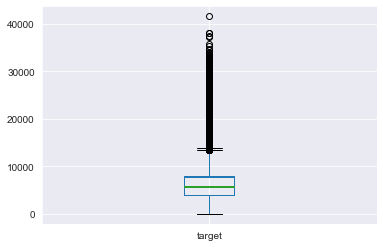

In [21]:
trainData.boxplot(column="target")


print(trainData[trainData["target"]>14000].count().shopID/trainData.count().shopID*100)
trainData.drop(trainData.index[trainData['target'] >14000], inplace = True)

trainData.boxplot(column="target")

trainData.count()

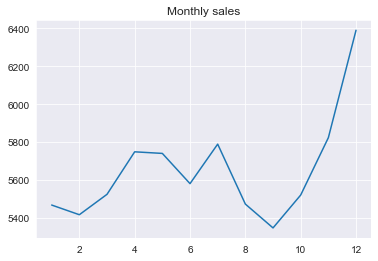

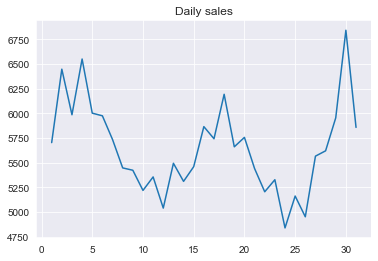

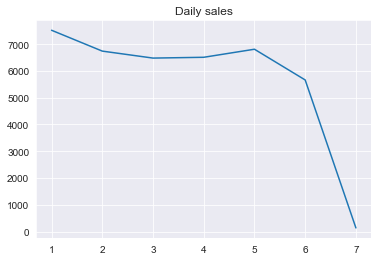

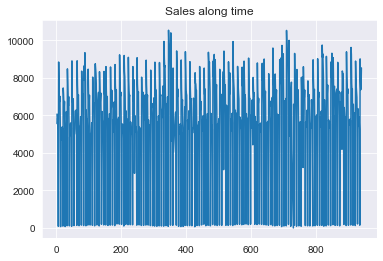

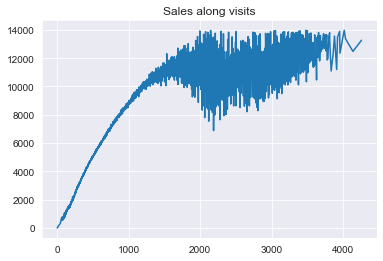

In [22]:
sales_by_month = trainData.groupby('month').mean()
plt.plot(sales_by_month["target"])
plt.title("Monthly sales")
plt.show()

sales_by_day = trainData.groupby('day').mean()
plt.plot(sales_by_day["target"])
plt.title("Daily sales")
plt.show()

sales_by_day_of_week = trainData.groupby('dayOfWeek').mean()
plt.plot(sales_by_day_of_week["target"])
plt.title("Daily sales")
plt.show()




sales_along_time = trainData.groupby('relativeDay').mean()
plt.plot(sales_along_time["target"])
plt.title("Sales along time")
plt.show()



sales_along_visits = trainData.groupby('visitNumber').mean()
plt.plot(sales_along_visits["target"])
plt.title("Sales along visits")
plt.show()



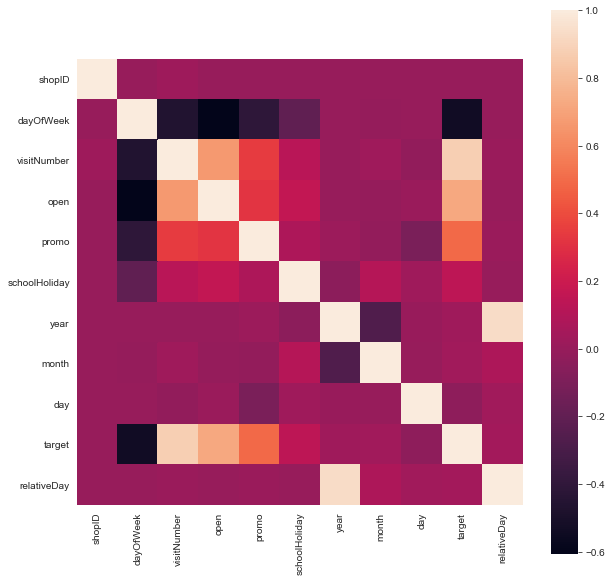

In [23]:
cormat=trainData.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cormat,square=True)

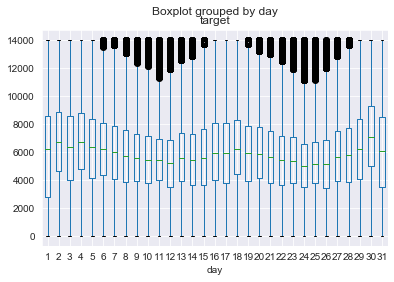

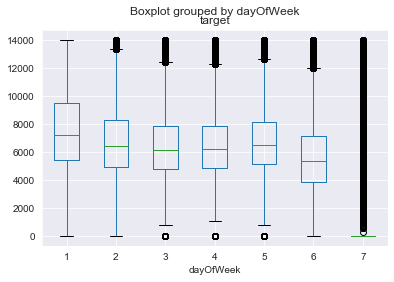

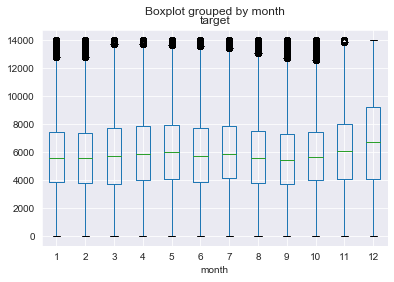

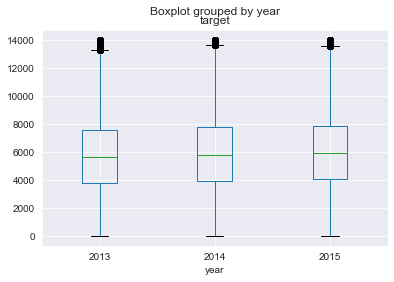

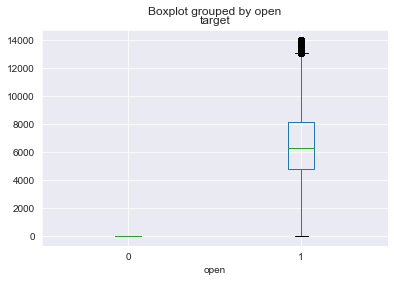

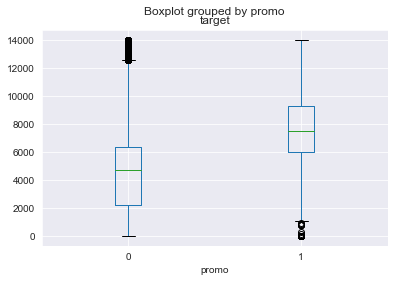

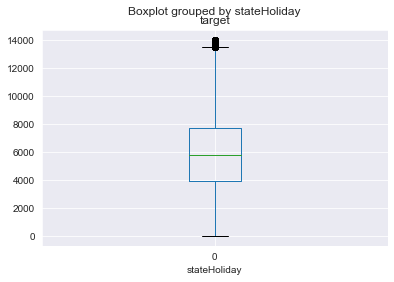

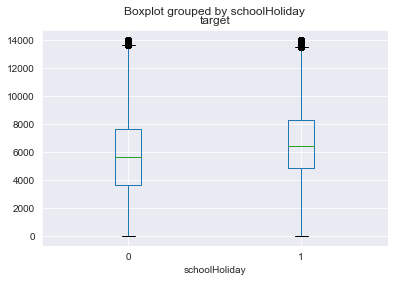

In [24]:
trainData.boxplot(column="target", by="day")
trainData.boxplot(column="target", by="dayOfWeek")
trainData.boxplot(column="target", by="month")
trainData.boxplot(column="target", by="year")
trainData.boxplot(column="target", by="open")
trainData.boxplot(column="target", by="promo")
trainData.boxplot(column="target", by="stateHoliday")
trainData.boxplot(column="target", by="schoolHoliday")



In [25]:
Ytrain= trainData["target"]
trainData.count()
Ytrain.count()
Ytrain.head()


del trainData["target"]

trainData.head()

,shopID,dayOfWeek,date,visitNumber,open,promo,stateHoliday,schoolHoliday,year,month,day,relativeDay
0,625,3,2013-11-06,641,1,1,0,0,2013,11,6,306
1,293,2,2013-07-16,877,1,1,0,1,2013,7,16,196
2,39,4,2014-01-23,561,1,1,0,0,2014,1,23,388
3,676,4,2013-09-26,1584,1,1,0,0,2013,9,26,266
4,709,3,2014-01-22,1477,1,1,0,0,2014,1,22,387


# Data Preparation

In [26]:
trainData["dayOfWeek"]=pd.Categorical(trainData["dayOfWeek"],ordered=False)
trainData["year"]=pd.Categorical(trainData["year"],ordered=False)
trainData["month"]=pd.Categorical(trainData["month"],ordered=False)
trainData["day"]=pd.Categorical(trainData["day"],ordered=False)



#trainDataDummies=pd.get_dummies(trainData[["dayOfWeek","year","month","day"]])

#trainData=pd.concat([trainData,trainDataDummies],axis=1)

#del trainData["year"]
#del trainData["month"]
#del trainData["day"]
#del trainData["dayOfWeek"]

del trainData["shopID"]
del trainData["date"]







trainData.count()

dayOfWeek        671293
visitNumber      671293
open             671293
promo            671293
stateHoliday     671293
schoolHoliday    671293
year             671293
month            671293
day              671293
relativeDay      671293
dtype: int64

# Regression

In [9]:
regLasso = linear_model.Lasso()


regLasso = linear_model.Lasso()
regLasso.fit(trainData,Ytrain)

prev=regLasso.predict(trainData)
print("MSE=",mean_squared_error(Ytrain,prev))

MSE= 1737210.6360540434


In [10]:
prev[:10]

array([ 6911.79937179,  8216.57666121,  6270.56082693, 12167.76866806,
       11524.23617551,  6968.35708157,  7611.95195003,  8362.96928038,
        7414.00857657,  3764.56541886])

In [28]:
trainData.head(10)

,dayOfWeek,visitNumber,open,promo,stateHoliday,schoolHoliday,year,month,day,relativeDay
0,3,641,1,1,0,0,2013,11,6,306
1,2,877,1,1,0,1,2013,7,16,196
2,4,561,1,1,0,0,2014,1,23,388
3,4,1584,1,1,0,0,2013,9,26,266
4,3,1477,1,1,0,0,2014,1,22,387
5,6,877,1,0,0,0,2014,10,4,639
6,3,789,1,1,0,0,2013,6,5,155
8,3,941,1,1,0,0,2013,2,6,36
9,1,718,1,1,0,0,2013,10,21,291
10,4,317,1,0,0,0,2014,6,26,541


# Neural Nets

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(trainData, Ytrain)

# KNN

In [41]:
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(3)
knn.fit(trainData, Ytrain)
knn_pred = knn.predict(trainData)

print("MSE=",mean_squared_error(Ytrain,knn_pred))


MSE= 885304.9898729433


# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

c = DecisionTreeRegressor(min_samples_split=100)
dt = c.fit(trainData, Ytrain)
y_pred = c.predict(trainData)

print("MSE=",mean_squared_error(Ytrain,y_pred))

# SVM

# Random Forests